# Guidry Chapter 7

In [2]:
import sympy
from sympy import symbols, sin, cos, sinh, simplify
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

from einsteinpy.symbolic.christoffel import ChristoffelSymbols

sympy.init_printing()

## Lagrangian Formulation

$$
L = \left( g_{\mu\nu}\dot{x}^\mu\dot{x}^\nu \right)^{\frac{1}{2}} 
$$

where $\dot{x^\mu} = dx^\mu/ds$ 

### Euler Lagrange equations

$$
\frac{d}{ds}\frac{\partial L}{\partial \dot{x}^\mu} - \frac{\partial L}{\partial x^\mu} = 0
$$


## Christoffel symbols

$$
\Gamma_{\lambda\mu}^\sigma = \frac{1}{2}
g^{\nu\sigma}\left(
g_{\mu\nu,\lambda}+g_{\lambda\nu,\mu}-g_{\mu\lambda,\nu}
\right)
$$

### Christoffel symbols for diagonal metric
for $\lambda \neq \mu \neq \sigma$ the symbols are 0.

For $\sigma \neq \mu$, 

$$
\Gamma^\sigma_{\mu\mu} = -\frac{1}{2}g^{\sigma\sigma}g_{\mu\mu,\sigma}
$$

For $\lambda = \mu = \sigma$,

$$
\Gamma^\mu_{\mu\mu} = \frac{1}{2}g^{\mu\mu}g_{\mu\mu,\mu}
$$

For $\sigma = \mu \neq \lambda$,

$$
\Gamma^\mu_{\lambda\mu} = \frac{1}{2}g^{\mu\mu}g_{\mu\mu,\lambda}
$$

### Problem 7.2 

Write an expression for the covariant derivative of $g_{\mu\nu}$. Use general covariance and the principal of equivalence to show that it vanishes in all frames.

#### Solution

For a general 2-tensor, we have

$$
A^{ab}_{;c} = A^{ab}_{,c} + \Gamma^b_{\rho\gamma}A^{a\rho} + \Gamma^a_{\rho\gamma}A^{\rho b} 
$$

Therefore 

$$
g^{\mu\nu}_{;\lambda} = g^{\mu\nu}_{,\lambda} + \Gamma^\nu_{\rho\lambda}g^{\mu\rho} + \Gamma^\mu_{\rho\lambda}g^{\rho \nu} 
$$

In an inertial frame, $g^{\mu\nu} = \eta^{\mu\nu}$ and $\Gamma = 0$. Therefore $g^{\mu\nu}_{;\lambda} = 0$ on an intertial frame, which means that it vanishes on every frame.

### Problem 7.4

#### Solution

The metric for $ds^2 = dr^2 + r^2\theta^2$ is $diag(1, r^2)$, so the Lagrangian is:
$$
L = \dot{r}^2 + r^2 \dot{\theta}^2
$$

We compute the four partial derivatives

$$
\frac{\partial L}{\partial r} = 2r\dot{\theta}^2\\
\frac{\partial L}{\partial \dot{r}} = 2\dot{r}\\
\frac{\partial L}{\partial \theta} =0\\
\frac{\partial L}{\partial \dot{\theta}} = 2r^2\dot{\theta}
$$

And plugging into the EL equations we get the 

$$
\ddot{\theta} + \dot{r}\dot{\theta}/r = 0\\
\ddot{r} - r\dot{\theta}^2 = 0
$$

and compare to the geodesic equation 
$$
\ddot{x}^\lambda = \Gamma^\lambda_{\mu\nu}\dot{x}^\mu\dot{x}^\nu
$$

to get

$$
\Gamma^r_{\theta\theta} = -r\\
\Gamma^{\theta}_{r\theta} = \Gamma^{\theta}_{\theta r} = 1/r
$$

### Problem 7.5 

Find all non-vanishing Christoffel symbols for the metric $ds^2 = -dt^2+dr^2+(\rho^2+r^2)(d\theta^2 + sin^2\theta d\phi^2$

In [4]:
# Setup the metric tensor

syms = sympy.symbols("t r theta phi rho")
t, r, th, ph, rho = syms
m = sympy.diag(-1, 1, r ** 2 + rho**2,  (r ** 2 + rho**2)*sin(th)**2 ).tolist()
metric = MetricTensor(m, syms[0:4])

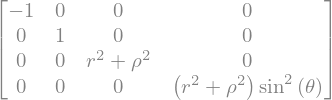

In [5]:
metric.tensor()

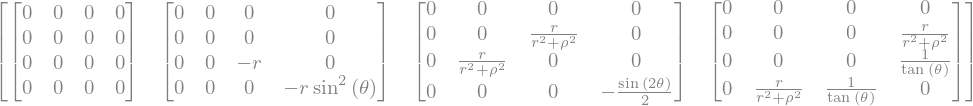

In [6]:
# Compute the Christoffel Symbols

cs = ChristoffelSymbols.from_metric(metric)

simplify(cs.tensor())

### Problem 7.6

Find all non-vanishing Christoffel symbols for the metric $ds^2 = -dt^2+a(t)(dx^2+dy^2+dz^2)$

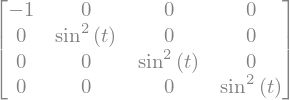

In [7]:
# Example: an oscillating universe

syms = sympy.symbols("t r theta phi")
t, r, th, ph = syms
m = sympy.diag(-1, sin(t)**2, sin(t)**2, sin(t)**2 ).tolist()
metric = MetricTensor(m, syms)
metric.tensor()

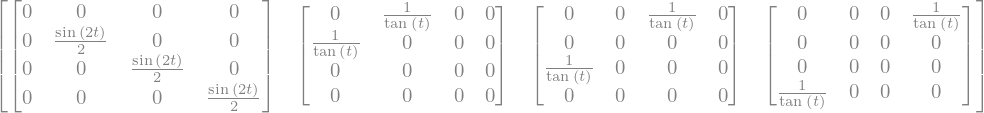

In [8]:
simplify(ChristoffelSymbols.from_metric(metric).tensor())

### Problem 7.9

Show 

$$
\Gamma_{\lambda\sigma}^\sigma = \frac{1}{2}
g^{\nu\sigma}g_{\sigma\nu,\lambda}
$$


#### Solution

$$
\Gamma_{\lambda\sigma}^\sigma = \frac{1}{2}
g^{\nu\sigma}\left(
g_{\sigma\nu,\lambda}+g_{\lambda\nu,\sigma}-g_{\sigma\lambda,\nu}
\right)
$$

Look at 

$$
g^{\nu\sigma}\left(
g_{\lambda\nu,\sigma}-g_{\sigma\lambda,\nu}
\right) = 
g^{\nu\sigma}g_{\lambda\nu,\sigma} 
- 
g^{\nu\sigma}g_{\sigma\lambda,\nu}
$$

In the first member, swap the indices $\sigma, \nu$

$$
g^{\sigma\nu}g_{\lambda\sigma,\nu} 
- 
g^{\nu\sigma}g_{\sigma\lambda,\nu}
$$

and use symmetry of the metric tensor to show they cancel out.

### Problem 7.20

Derive $\frac{dV}{d\lambda} = \left( \partial_\nu V^\mu + \Gamma^\mu_{a\nu} V^a\right) u^\nu e_\mu$ (7.14)
from $\frac{dV}{d\lambda} = \frac{dV^\mu}{d\lambda} e_\mu + \frac{de_\mu}{d\lambda}V^\mu$ (7.12)

#### Solution

$\partial_\nu e_mu$ lies on the space spanned by the $e_\mu$, therefore it is a linear combination of the basis vectors:
$\partial_\nu e_\mu = \Gamma^\kappa_{\mu\nu} e_\kappa$.

Expanding the total derivatives in (7.12) we get

$$
\frac{dV}{d\lambda} = \frac{dV^\mu}{d\lambda} e_\mu + \frac{de_\mu}{d\lambda}V^\mu = 
\partial_\nu V^\mu u^\nu e_\mu + V^\mu \partial_\nu e_\mu u^\nu = 
\partial_\nu V^\mu u^\nu e_\mu + V^\mu \Gamma^\kappa_{\mu\nu} e_\kappa u^\nu
$$

where I have used $u^\nu := \frac{dx^\nu}{d\lambda}$

In the above expression make the index substitutions $\mu \rightarrow a$ and $\kappa \rightarrow \mu$ to get

$$
\frac{dV}{d\lambda} = u^\nu e_\mu \left(
\partial_\nu V^\mu + \Gamma^\mu_{a\nu} V^a \right)
$$

from which it follows

$$
\nabla_\nu V^\mu = \partial_\nu V^\mu + \Gamma^\mu_{a\nu} V^a
$$